# Extending Census Income Dataset: Incorporating Time Series Variable

Adding `timestamp` and `ID` to the Census Income dataset to enable **sequence modeling** and **association rule mining** in SAS Enterprise Miner.

In [1]:
%pip install mockseries pandas pyarrow -U

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
from datetime import datetime
from mockseries.trend import LinearTrend
from mockseries.seasonality import SinusoidalSeasonality
from mockseries.noise import RedNoise
from mockseries.utils import datetime_range, plot_timeseries, write_csv

## 1. Generating Mock Time Series Data

In [3]:
trend = LinearTrend(coefficient=2, time_unit=timedelta(days=4), flat_base=100)
seasonality = SinusoidalSeasonality(amplitude=20, period=timedelta(days=7)) + SinusoidalSeasonality(amplitude=4, period=timedelta(days=1))
noise = RedNoise(mean=0, std=3, correlation=0.5)
timeseries = trend + seasonality + noise

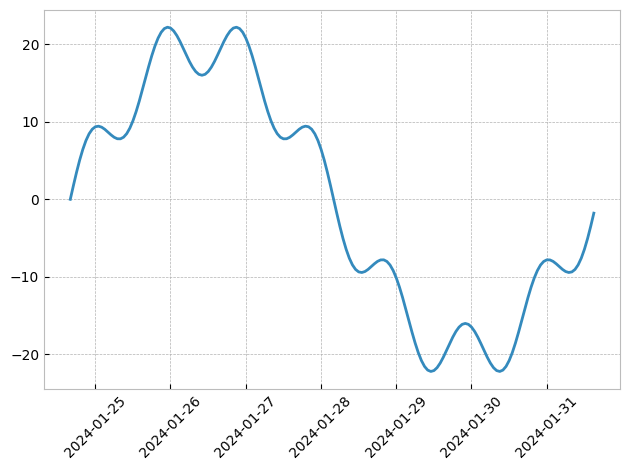

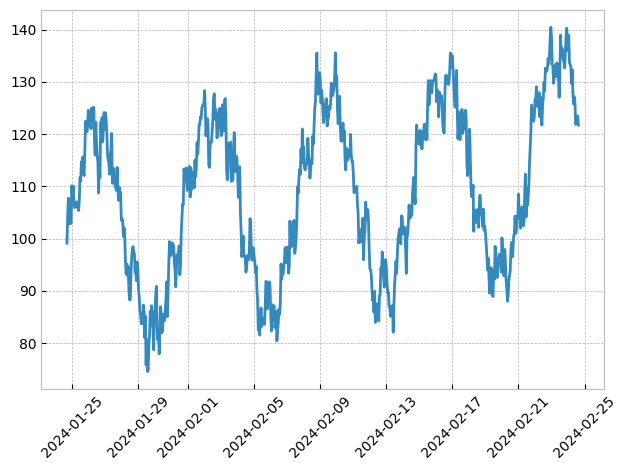

In [4]:
seasonality.preview_week()
timeseries.preview_month()

In [5]:
time_points = datetime_range(
    granularity=timedelta(minutes=60),
    start_time=datetime(2020, 3, 28),
    end_time=datetime(2023, 12, 30),
)
time_points = time_points[:32561]

In [6]:
ts_values = timeseries.generate(time_points=time_points)

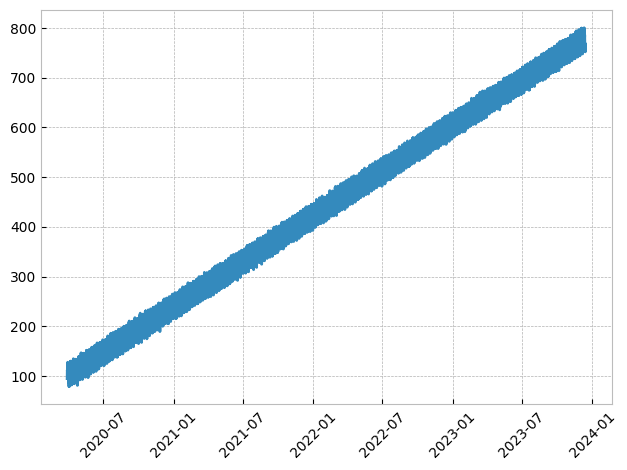

In [7]:
plot_timeseries(time_points, ts_values)
write_csv(time_points, ts_values, "./data/hello_mockseries.csv")

## 2. Adding Time Stamp and ID to Census Income Dataset

In [8]:
data = pd.read_csv("./data/cleaned_data.csv")
data.insert(loc=0, column="timestamp", value=time_points)  # add timestamp column
data.insert(loc=0, column="id", value=np.random.randint(0, 100, size=(len(data), 1)))  # add id column

In [9]:
data.sample(5)

,id,timestamp,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,gross_income
20079,87,2022-07-12 15:00:00,55,Federal-gov,145401,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
18259,68,2022-04-27 19:00:00,19,?,46400,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,24,United-States,<=50K
25386,80,2023-02-18 18:00:00,26,Private,98155,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
10901,12,2021-06-25 05:00:00,30,Private,340917,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
31123,85,2023-10-15 19:00:00,25,?,214925,10th,6,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K


In [10]:
data.to_csv('./data/cleaned_data_synthesized.csv')